In [2]:
%run Paywall-Utils.ipynb

Using TensorFlow backend.


Automatically created module for IPython interactive environment
X.shape  (10346,)  Y.shape  (10346,)  x.shape  (1826,)  y.shape  (1826,)


In [3]:
emb_matrix = get_embeded_matrix(X)

a = [k for k in tok.tokenizer.word_index.keys()]
df = pd.DataFrame(data=emb_matrix, columns=a)

df.head(1)

Matrix shape :  (10346, 4260)


,hamburger sv,geo,d,hamburger sv,pauli,fußball,hamburg,zweite bundesliga,erste bundesliga,fc st,...,tasci,serdar,nivea,hildegard,kimmich,mgm,uefa,wilde,celine,amtsgerichte
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_sequences_matrix_pos, X_embeded_matrix_pos, Y_pos, x_sequences_matrix_pos, x_embeded_matrix_pos, y_pos, tok_pos = get_pos_matrix()

a = [k for k in tok_pos.tokenizer.word_index.keys()]
df_pos = pd.DataFrame(data=X_embeded_matrix_pos, columns=a)


X_sequences_matrix_neg, X_embeded_matrix_neg, Y_neg, x_sequences_matrix_neg, x_embeded_matrix_neg, y_neg, tok_neg = get_neg_matrix()

b = [k for k in tok_neg.tokenizer.word_index.keys()]
df_neg = pd.DataFrame(data=X_embeded_matrix_neg, columns=b)


X.shape  (8632,)  Y.shape  (8632,)  x.shape  (1524,)  y.shape  (1524,)
(8632,) (1524,) (8632,) (1524,)
X.shape  (1713,)  Y.shape  (1713,)  x.shape  (303,)  y.shape  (303,)
(1713,) (303,) (1713,) (303,)


<b>-------------- MCA ----------------------</b>

In [5]:
m = MCAPrinceModel()
r, c = m.fit(df)

MCA done---------


In [ ]:
m.plot_mca(df, y_component=1, show_row_labels=False, show_column_labels=False)

In [ ]:
m_pos = MCAPrinceModel()
m_pos.fit(df_pos)

In [ ]:
m_pos.plot_mca(df_pos, y_component=1, show_row_labels=False, show_column_labels=False)

In [ ]:
m_neg = MCAPrinceModel()
m_neg.fit(df_neg)

m_neg.plot_mca(df_neg, y_component=1, show_row_labels=False, show_columncorrels=False)

<b>-------------- PCA ----------------------</b>

In [27]:
p = PCAPrinceModel(dim=100)
r, corr, eig = p.fit(df)

PCA done---------


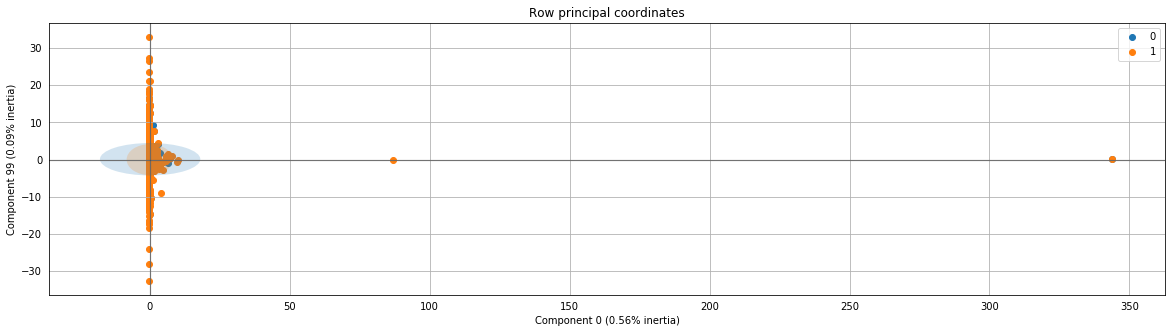

In [28]:
p.plot_pca(df, Y,  y_component=99)

PCA done---------


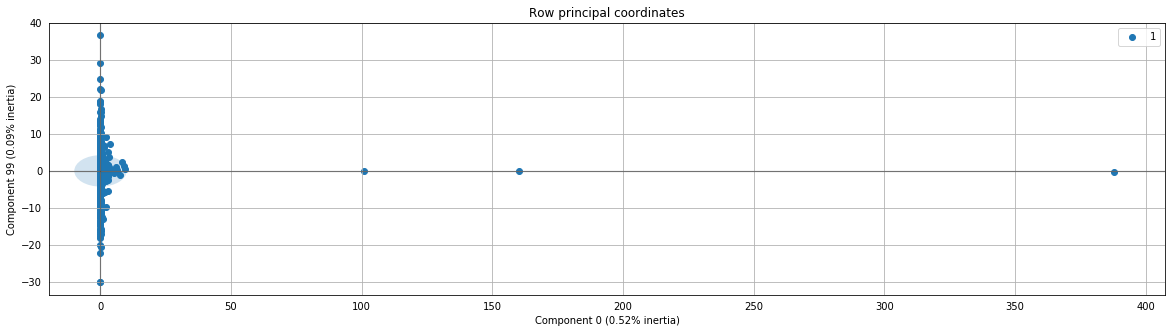

In [18]:
p_pos = PCAPrinceModel(dim=100, center=False)
p_pos.fit(df_pos)

p_pos.plot_pca(df_pos, Y_pos,  y_component=99)

In [17]:
#p_pos.fit(df_pos)


PCA done---------


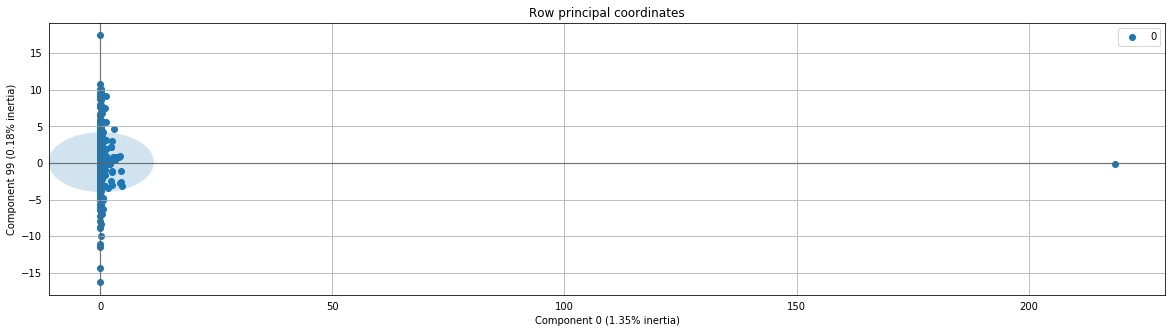

In [19]:
p_neg = PCAPrinceModel(dim=100, center=False)
p_neg.fit(df_neg)

p_neg.plot_pca(df_neg, Y_neg,  y_component=99)

In [2]:
# from keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer(num_words = None)
# texts = ['a b b c c c', 'a b b c c']
# tokenizer.fit_on_texts(texts)
# print(tokenizer.word_index.keys())
# print(tokenizer.texts_to_matrix(texts, mode='tfidf'))
# print(tokenizer.texts_to_matrix(texts, mode='tfidf')[:, 1:])